## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data.csv',names=['X','y'])

In [3]:
df.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'y')

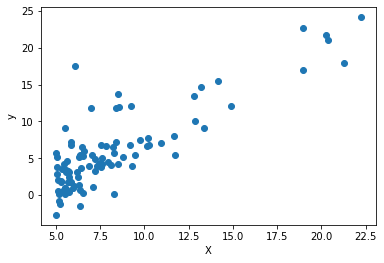

In [4]:
plt.scatter(df['X'],df['y'])
plt.xlabel('X')
plt.ylabel('y')

In [5]:
X_bar = np.mean(df['X'])
y_bar = np.mean(df['y'])

In [6]:
cov_Xy = np.mean(df['X']*df['y']) - X_bar*y_bar

In [7]:
var_X = np.mean(df['X']**2) - X_bar**2

In [8]:
b_yX = cov_Xy/var_X

In [9]:
predictions = y_bar + b_yX*(df['X'] - X_bar)

Text(0, 0.5, 'y')

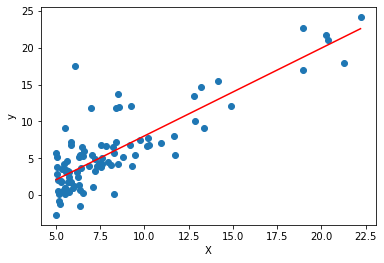

In [10]:
plt.scatter(df['X'],df['y'])
plt.plot([min(df['X']),max(df['X'])],[min(predictions),max(predictions)],'red')
plt.xlabel('X')
plt.ylabel('y')

## Gradient Descent

In [11]:
X = np.linspace(0,100,20)
y = (X - 4)**2 + 5

Text(0, 0.5, 'y')

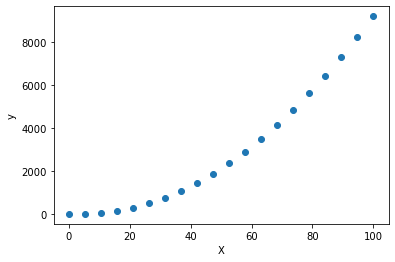

In [12]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [13]:
def gradient_descent(X,y,iterations,alpha):
    theta = np.array([0.1,0.01])
    X = np.array([[i,1] for i in X])
    costs = []
    for i in range(iterations):
        predictions = X.dot(theta)
        loss = y - predictions
        gradient = X.T.dot(loss)*(-2/float(len(X)))
        theta = theta - gradient*alpha
        costs.append(np.mean(loss**2))
    return theta,costs

In [14]:
theta,costs = gradient_descent(X,y,iterations=1000,alpha=0.0001)

In [15]:
print(costs[:10])

[17676046.83726577, 2956607.398012496, 1490035.9479113955, 1343856.994202416, 1329229.6735005232, 1327708.9406581675, 1327494.0331402812, 1327409.2327366685, 1327337.4018205474, 1327266.8698876516]


In [16]:
print(theta)

[ 70.40760689 -80.68934497]


In [17]:
weight,bias = theta
predictions = X*weight + bias

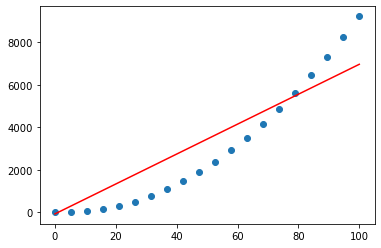

In [18]:
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(predictions),max(predictions)],'red')

## RMSE and R$^2$

In [19]:
df = pd.read_csv('headbrain.csv')

In [20]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [21]:
X = df['Head Size(cm^3)']
y = df['Brain Weight(grams)']

In [22]:
X_bar = np.mean(X)
y_bar = np.mean(y)

In [23]:
cov_Xy = np.mean(X*y) - X_bar*y_bar
var_X = np.mean(X**2) - X_bar**2

In [24]:
m = cov_Xy/var_X

In [25]:
c = y_bar - m*X_bar

In [26]:
print(m,c)

0.2634293394893941 325.57342104946156


In [27]:
predictions = m*X + c

Text(0, 0.5, 'Brain Weight(grams)')

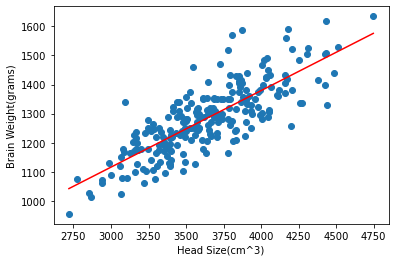

In [28]:
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(predictions),max(predictions)],'red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')

In [29]:
rmse = np.sqrt(np.mean((y-predictions)**2))

In [30]:
print(rmse)

72.12062137837094


In [31]:
r2 = sum((predictions-y_bar)**2)/sum((y-y_bar)**2)

In [32]:
print(r2)

0.6393117199569744
